<a href="https://colab.research.google.com/github/ct24-saretmedina/Repositorio_Saret_Medina/blob/main/Mini_Proyecto_Dashboard_Personal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files


# Carga del Archivo Subido


uploaded = files.upload()

if not uploaded:
    print(" Error: No se ha subido ningún archivo. No se puede continuar.")
    df = pd.DataFrame()
else:
    # Obtener el nombre del primer archivo subido.
    nombre_archivo = list(uploaded.keys())[0]
    print("Archivo subido:", nombre_archivo)

    # Cargar el archivo CSV en un DataFrame de Pandas.
    try:
        df = pd.read_csv(nombre_archivo)
        print(" CSV cargado exitosamente en el DataFrame 'df'.")

        #
        #  LIMPIEZA Y PREPROCESAMIENTO PARA EL ANÁLISIS


        # Directorio para guardar los gráficos
        OUTPUT_DIR = 'dashboard_graphs_mental'
        os.makedirs(OUTPUT_DIR, exist_ok=True)
        sns.set_theme(style="whitegrid")
        plt.style.use('seaborn-v0_8-pastel')
        print(f"\nLos gráficos se guardarán en la carpeta: {OUTPUT_DIR}")

        # Renombrar columnas para facilitar el manejo (eliminar espacios y corchetes)
        df.columns = df.columns.str.replace(' ', '_').str.replace('[', '', regex=False).str.replace(']', '', regex=False)

        # Mapeo de Frecuencias a Valores Numéricos (para el eje X secuencial de 0 a 3)
        frequency_map = {
            'Never': 0,
            'Rarely': 1,
            'Sometimes': 2,
            'Very frequently': 3
        }

        # ç mapeo de columnas de frecuencia de género
        frequency_cols = [col for col in df.columns if col.startswith('Frequency_')]
        for col in frequency_cols:
            df[col] = df[col].map(frequency_map)

        # Variables de Salud Mental
        mental_health_vars = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
        df[mental_health_vars] = df[mental_health_vars].fillna(df[mental_health_vars].mean())

        # Definición de los géneros clave a analizar
        GENERO_1 = 'Frequency_Rock'
        GENERO_2 = 'Frequency_Classical'
        GENERO_3 = 'Frequency_Hip_hop'


        def create_trend_df(df, frequency_col):
            return df.groupby(frequency_col)[mental_health_vars].mean().reset_index()

        df_rock_trend = create_trend_df(df, GENERO_1)
        df_classical_trend = create_trend_df(df, GENERO_2)
        df_hiphop_trend = create_trend_df(df, GENERO_3)

        print("\nPreprocesamiento completado. Datos listos para graficar.")

    except pd.errors.ParserError:
        print(f" Error de Parsing: El archivo '{nombre_archivo}' no tiene un formato CSV válido.")
        df = pd.DataFrame()
    except Exception as e:
        print(f" Error inesperado al leer o procesar el archivo: {e}")
        df = pd.DataFrame()

Saving mxmh_survey_results.csv to mxmh_survey_results (1).csv
Archivo subido: mxmh_survey_results (1).csv
 CSV cargado exitosamente en el DataFrame 'df'.

Los gráficos se guardarán en la carpeta: dashboard_graphs_mental

Preprocesamiento completado. Datos listos para graficar.


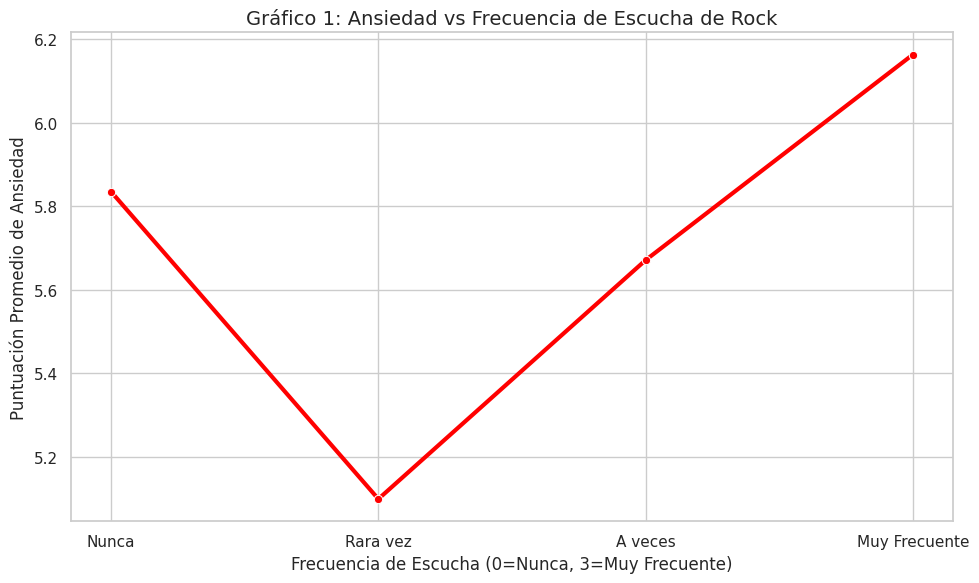

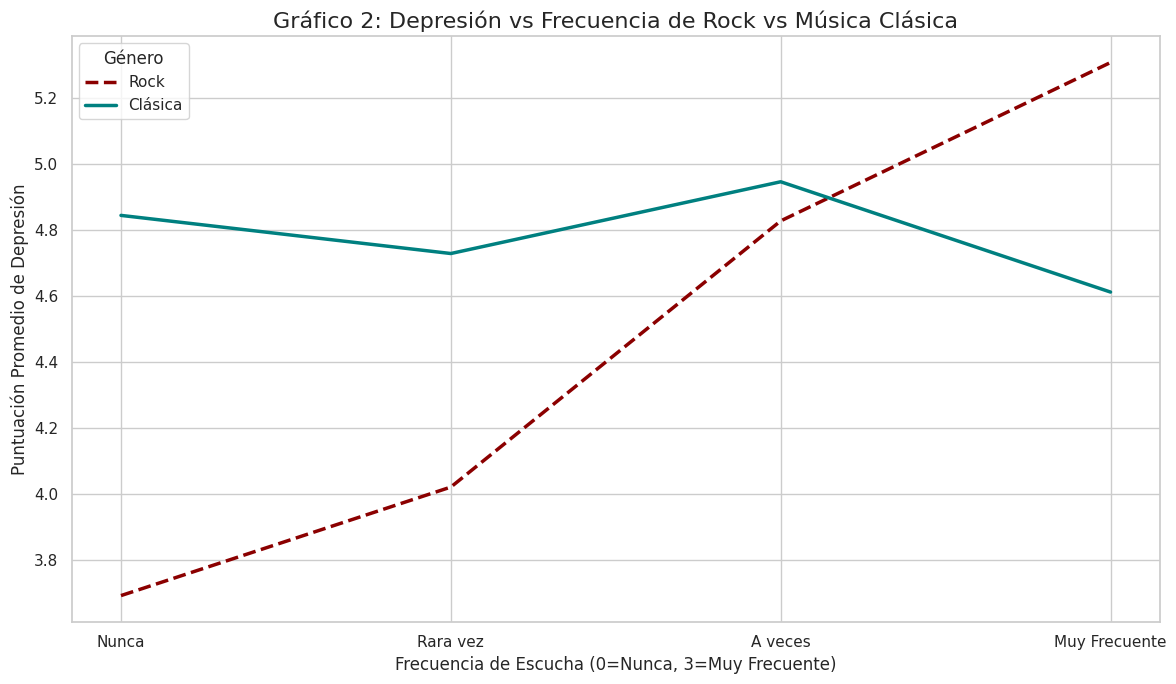

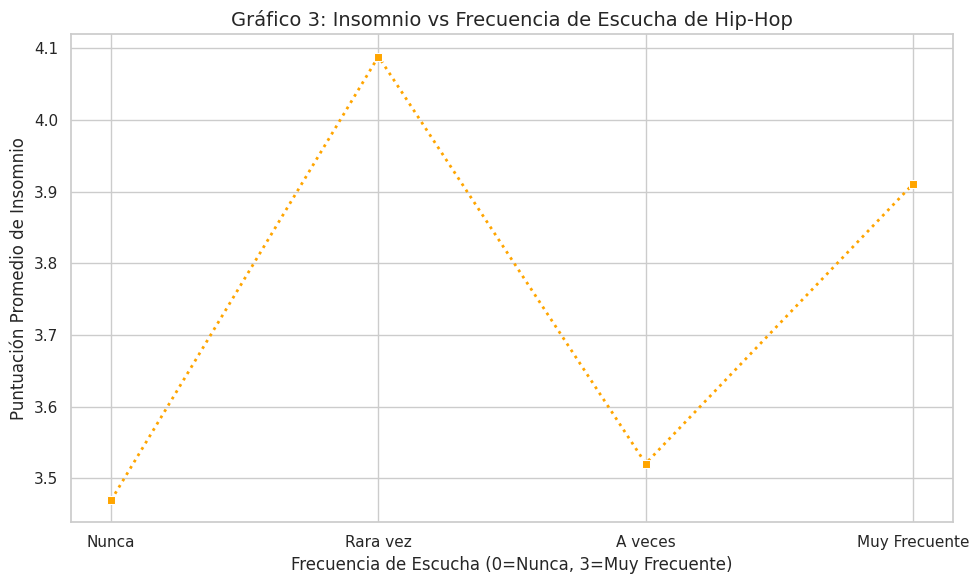

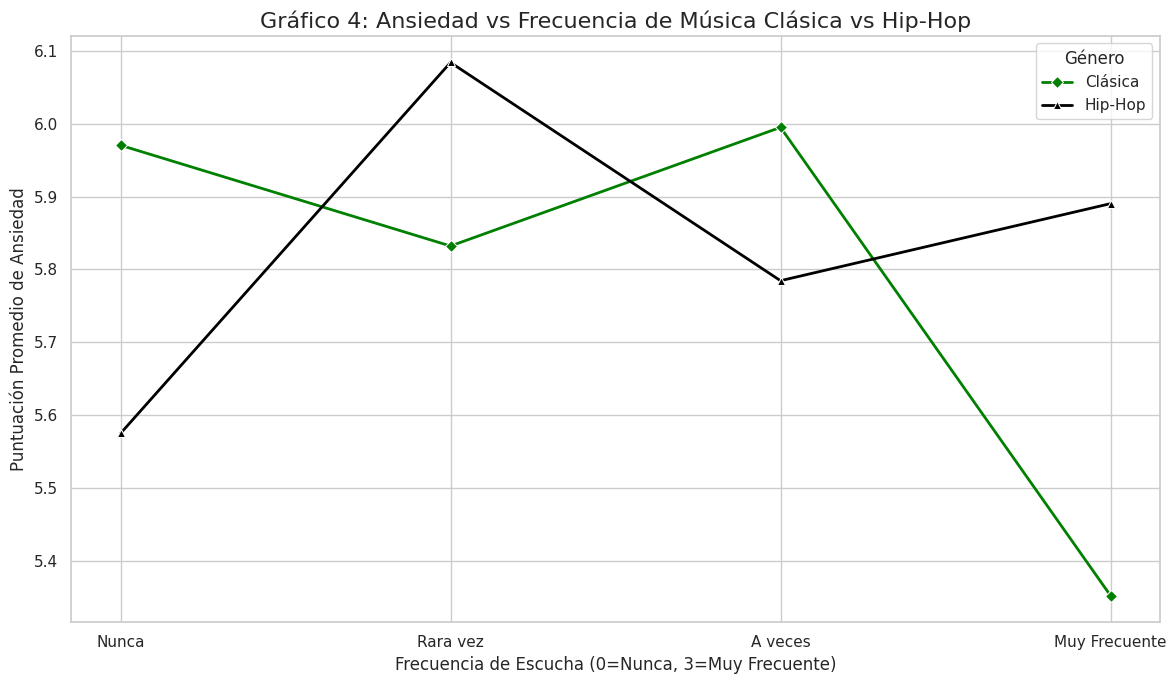

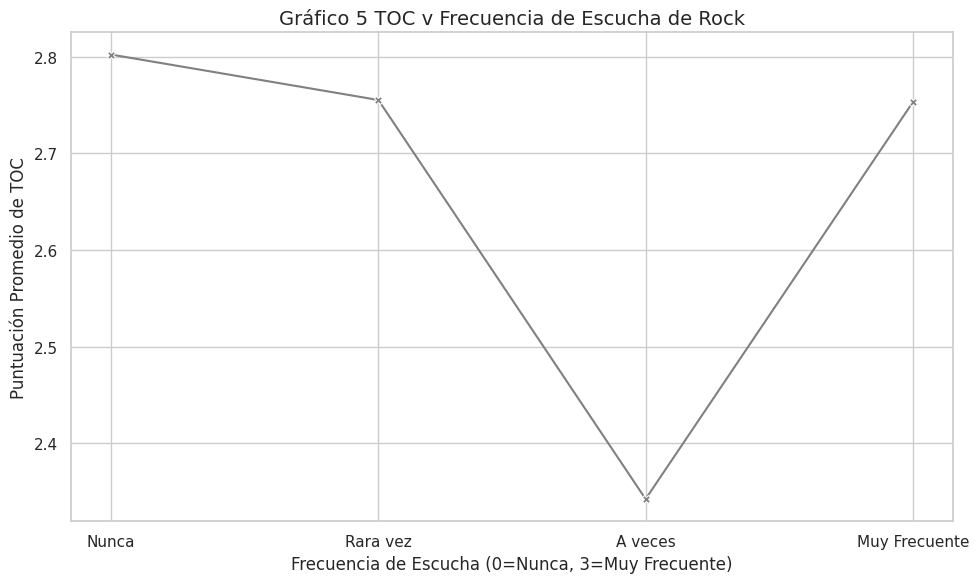


 Si me salieron las graficas!


In [30]:

# CREACIÓN DE LOS GRÁFICOS (5 Gráficos de Línea)


if 'df' in locals() and not df.empty and 'df_rock_trend' in locals():

    # --- Gráfico 1: Ansiedad vs Rock ( ---
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=GENERO_1, y='Anxiety', data=df_rock_trend,
                 marker='o', color='red', linewidth=3)
    plt.title('Gráfico 1: Ansiedad vs Frecuencia de Escucha de Rock', fontsize=14)
    plt.xlabel('Frecuencia de Escucha (0=Nunca, 3=Muy Frecuente)', fontsize=12)
    plt.ylabel('Puntuación Promedio de Ansiedad', fontsize=12)
    plt.xticks([0, 1, 2, 3], ['Nunca', 'Rara vez', 'A veces', 'Muy Frecuente'])
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, '01_Ansiedad_Rock.png'))
    plt.show()

    # --- Gráfico 2:Depresión por Frecuencia de Rock vs Clásica  ---
    plt.figure(figsize=(12, 7))
    sns.lineplot(x=GENERO_1, y='Depression', data=df_rock_trend,
                 label='Rock', color='darkred', linestyle='--', linewidth=2.5)
    sns.lineplot(x=GENERO_2, y='Depression', data=df_classical_trend,
                 label='Clásica', color='teal', linestyle='-', linewidth=2.5)

    plt.title('Gráfico 2: Depresión vs Frecuencia de Rock vs Música Clásica', fontsize=16)
    plt.xlabel('Frecuencia de Escucha (0=Nunca, 3=Muy Frecuente)', fontsize=12)
    plt.ylabel('Puntuación Promedio de Depresión', fontsize=12)
    plt.xticks([0, 1, 2, 3], ['Nunca', 'Rara vez', 'A veces', 'Muy Frecuente'])
    plt.legend(title='Género')
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, '02_Depresion_Rock_vs_Clasica.png'))
    plt.show()

    # --- Gráfico 3 Insomnio vs Frecuencia de Hip-Hop ---
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=GENERO_3, y='Insomnia', data=df_hiphop_trend,
                 marker='s', color='orange', linestyle=':', linewidth=2)

    plt.title('Gráfico 3: Insomnio vs Frecuencia de Escucha de Hip-Hop', fontsize=14)
    plt.xlabel('Frecuencia de Escucha (0=Nunca, 3=Muy Frecuente)')
    plt.ylabel('Puntuación Promedio de Insomnio')
    plt.xticks([0, 1, 2, 3], ['Nunca', 'Rara vez', 'A veces', 'Muy Frecuente'])
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, '03_Insomnio_Hiphop.png'))
    plt.show()

    # --- Gráfico 4 Ansiedad por Frecuencia de Clásica vs Hip-Hop ---
    plt.figure(figsize=(12, 7))
    sns.lineplot(x=GENERO_2, y='Anxiety', data=df_classical_trend,
                 label='Clásica', color='green', marker='D', linewidth=2)
    sns.lineplot(x=GENERO_3, y='Anxiety', data=df_hiphop_trend,
                 label='Hip-Hop', color='black', marker='^', linewidth=2)

    plt.title('Gráfico 4: Ansiedad vs Frecuencia de Música Clásica vs Hip-Hop', fontsize=16)
    plt.xlabel('Frecuencia de Escucha (0=Nunca, 3=Muy Frecuente)', fontsize=12)
    plt.ylabel('Puntuación Promedio de Ansiedad', fontsize=12)
    plt.xticks([0, 1, 2, 3], ['Nunca', 'Rara vez', 'A veces', 'Muy Frecuente'])
    plt.legend(title='Género')
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, '04_Ansiedad_Clasica_vs_Hiphop.png'))
    plt.show()

    # --- Gráfico 5:  TOC vs  Rock ---
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=GENERO_1, y='OCD', data=df_rock_trend,
                 marker='X', color='gray', linestyle='-', linewidth=1.5)

    plt.title('Gráfico 5 TOC v Frecuencia de Escucha de Rock', fontsize=14)
    plt.xlabel('Frecuencia de Escucha (0=Nunca, 3=Muy Frecuente)')
    plt.ylabel('Puntuación Promedio de TOC')
    plt.xticks([0, 1, 2, 3], ['Nunca', 'Rara vez', 'A veces', 'Muy Frecuente'])
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, '05_OCD_Rock.png'))
    plt.show()

    print("\n Si me salieron las graficas!")
else:
    print("\n No me salieron las graficas")

#  Documentación Dashboard Música y Salud Mental

---

## Resumen

Este dashboard analiza cómo la **frecuencia de escucha** de géneros musicales específicos (Rock, Clásica, Hip-Hop) se correlaciona con las puntuaciones promedio de ansiedad, depresión, insomnio y TOC de los encuestados. La frecuencia de escucha se utiliza como una variable secuencial (Eje X) para trazar las tendencias de salud mental (Eje Y).

---

###  Análisis por Gráfico

#### Gráfico 1: Ansiedad vs. Frecuencia de Rock
*  Existe una **tendencia ascendente** en la puntuación de Ansiedad a medida que los encuestados escuchan Rock con mayor frecuencia, sugiriendo una correlación positiva entre los altos niveles de ansiedad y el hábito de escuchar este género.

#### Gráfico 2: Depresión por Frecuencia de Rock vs. Música Clásica
*  La **Música Clásica** se correlaciona con una puntuación de depresión promedio **consistentemente más baja** que el Rock en todos los niveles de frecuencia. Esto sugiere que, en general, los hábitos de escucha de Clásica están menos asociados a la depresión.

#### Gráfico 3: Insomnio vs. Frecuencia de Hip-Hop
* La relación es **no lineal**. Las puntuaciones de Insomnio son más altas en los grupos que escuchan Hip-Hop solo **"Rara vez" o "A veces"** y disminuyen en el grupo de oyentes "Muy Frecuentes", indicando que para algunos, el uso constante del Hip-Hop podría ser una estrategia de acompañamiento o *coping*.

#### Gráfico 4: Ansiedad por Frecuencia de Música Clásica vs. Hip-Hop
*  Al comparar ambos géneros, la **Música Clásica** está asociada a una **menor puntuación de ansiedad** en todos los niveles de frecuencia. Esto refuerza la idea de que la música instrumental o percibida como "relajante" tiene una correlación más baja con las puntuaciones de ansiedad.

#### Gráfico 5: Puntuación de TOC vs. Frecuencia de Rock
*  La puntuación de TOC muestra una **relación irregular**, sin un patrón lineal claro con la frecuencia de escucha de Rock. Esto indica que la frecuencia de este género es un factor débil para predecir la puntuación de TOC, siendo este último posiblemente más influenciado por otras variables personales.